In [1]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

### Description of the investigation:

Dataset used: https://www.kaggle.com/rhuebner/human-resources-data-set

Using this HR dataset, I am investigating internals of an organisation like the average age of the employees, common reasons for attrition, whether gender discrimination prevalent in the organisation, whether low salaries are causing dissatisfaction, which recruitments portals are popular for hiring, whether company follows multicultural mindset and so on.

These insights help an organisation make key policy decisions like Recruitment and Separation, Leave of absence, Pay and benefits, Equal oppurtunity, Code of Conduct related, Financial policies etc. to name a few.

My investigation would be based on below questions:

1. Perform Data cleaning on below columns:
    a. Date format is different. 
    b. ManagerID is null 
    
2. a)Calculate Age of all the employees
   b) Find min and max age
   This information is needed by the company to plan its policies which should support equal oppurtunity for all.
  
3. List down names of all employees > 60 years. This information may be needed by the organisation to plan for any elderly-care provision in their system.

4. What are the common reasons for attrition and how many employees left so far in each category. Display Top only 5 reasons for attrition. This information is required to reduce the attrition rates.

5. Show all recruitment sources. Based on this data company can plan to post ads in the top recruitment agencies only hence cost can be saved.

6. Out of Males and females who draw higher average salary? This information is needed to check for gender discrimination.

7. List all employees with their last name who took more than 2 weeks leave of absence. Such cases can be identified to understand if they are facing any issues so that counselling can be arranged if needed.

8. Average salary for all positions in the organisation. 

9. Check whether this organisation is multicultural

10. Find out ratio of employees in each department

11. How both genders fare in employee satisfaction and performance score

12. Overall performance of the employees

13. How many employees in each department and their number as per citizenship

14. Check if low salaries is the reason for dissatisfaction

15. How many males Vs females hired every year. This is required to check if gender based bias is present in the company.



In [2]:
# This function is created for data cleaning as the dates are in different format. Moreover where year is specified in yy format
#and the value is less than 69 then it is read as 2069 instead of 1969 hence below method is implemented to fix this issue

def fixDate(x):
    if x.year > 2020:
        year = x.year - 100
    else:
        year = x.year
    return datetime(year,x.month,x.day)

In [3]:
# Dataset used: https://www.kaggle.com/rhuebner/human-resources-data-set

# Reading csv file into dataframe 
df = pd.read_csv("HRDataset_v14.csv")

#df.describe()
df.DOB = pd.to_datetime(df.DOB)

df['DOB'] = df['DOB'].apply(fixDate)
df.head(10)

Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   
5         Anderson, Linda    10002          0                0         0   
6           Andreola, Colby  10194          0                0         0   
7               Athwal, Sam  10062          0                4         1   
8          Bachiochi, Linda  10114          0                0         0   
9        Bacong, Alejandro   10250          0                2         1   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   
5            1       5            4                       0   57568  ...   
6            1       4            3                       0   95660  ...   
7            1       5            3                       0   59365  ...   
8            3       5            3                       1   47837  ...   
9            1       3            3                       0   50178  ...   

       ManagerName  ManagerID   RecruitmentSource PerformanceScore  \
0   Michael Albert       22.0            LinkedIn          Exceeds   
1       Simon Roup        4.0              Indeed      Fully Meets   
2   Kissy Sullivan       20.0            LinkedIn      Fully Meets   
3     Elijiah Gray       16.0              Indeed      Fully Meets   
4   Webster Butler       39.0       Google Search      Fully Meets   
5         Amy Dunn       11.0            LinkedIn          Exceeds   
6  Alex Sweetwater       10.0            LinkedIn      Fully Meets   
7    Ketsia Liebig       19.0   Employee Referral      Fully Meets   
8   Brannon Miller       12.0  Diversity Job Fair      Fully Meets   
9     Peter Monroe        7.0              Indeed      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              4.60               5                    0   
1              4.96               3                    6   
2              3.02               3                    0   
3              4.84               5                    0   
4              5.00               4                    0   
5              5.00               5                    0   
6              3.04               3                    4   
7              5.00               4                    0   
8              4.46               3                    0   
9              5.00               5                    6   

  LastPerformanceReview_Date DaysLateLast30 Absences  
0                  1/17/2019              0        1  
1                  2/24/2016              0       17  
2                  5/15/2012              0        3  
3                   1/3/2019              0       15  
4                   2/1/2016              0        2  
5                   1/7/2019              0       15  
6                   1/2/2019              0       19  
7                  2/25/2019              0       19  
8                  1/25/2019              0        4  
9                  2/18/2019              0       16  

[10 rows x 36 columns]

In [4]:
# Data cleaning begins..

# 1. Look for null values 
#df.info()

# Remove duplicates if any
# Check shape before and after looking for duplicates
df.shape

#Check for duplicates and drop if any
df=df.drop_duplicates()

# Shape after dropping duplicates is same hence no duplicates available
df.shape

(311, 36)

In [5]:
# Check how many null values exist in the data set
df.isnull().sum()

# Below columns have null values
# DateofTermination 207 => This is a valid case as null value indicate that individuals are still employed
# ManagerID           8 => This null value need to be replaced



Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [6]:
# Replacing null value of ManagerID by '0'

missingMgrID = df[df['ManagerID'].isnull()]
df['ManagerID'].fillna('0',inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [7]:
# Reference: https://www.geeksforgeeks.org/python-program-to-calculate-age-in-year/
#2a. Calculate Age of all the employees

def calculateAge(dob): 
    today = date.today() 
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))   
    return age

df=df.assign(Age = df['DOB'].apply(calculateAge))
df.head(10)


Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   
5         Anderson, Linda    10002          0                0         0   
6           Andreola, Colby  10194          0                0         0   
7               Athwal, Sam  10062          0                4         1   
8          Bachiochi, Linda  10114          0                0         0   
9        Bacong, Alejandro   10250          0                2         1   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   
5            1       5            4                       0   57568  ...   
6            1       4            3                       0   95660  ...   
7            1       5            3                       0   59365  ...   
8            3       5            3                       1   47837  ...   
9            1       3            3                       0   50178  ...   

   ManagerID   RecruitmentSource PerformanceScore EngagementSurvey  \
0         22            LinkedIn          Exceeds             4.60   
1          4              Indeed      Fully Meets             4.96   
2         20            LinkedIn      Fully Meets             3.02   
3         16              Indeed      Fully Meets             4.84   
4         39       Google Search      Fully Meets             5.00   
5         11            LinkedIn          Exceeds             5.00   
6         10            LinkedIn      Fully Meets             3.04   
7         19   Employee Referral      Fully Meets             5.00   
8         12  Diversity Job Fair      Fully Meets             4.46   
9          7              Indeed      Fully Meets             5.00   

   EmpSatisfaction SpecialProjectsCount LastPerformanceReview_Date  \
0                5                    0                  1/17/2019   
1                3                    6                  2/24/2016   
2                3                    0                  5/15/2012   
3                5                    0                   1/3/2019   
4                4                    0                   2/1/2016   
5                5                    0                   1/7/2019   
6                3                    4                   1/2/2019   
7                4                    0                  2/25/2019   
8                3                    0                  1/25/2019   
9                5                    6                  2/18/2019   

  DaysLateLast30 Absences Age  
0              0        1  37  
1              0       17  45  
2              0        3  32  
3              0       15  32  
4              0        2  31  
5              0       15  43  
6              0       19  41  
7              0       19  37  
8              0        4  50  
9              0       16  32  

[10 rows x 37 columns]

In [8]:
# 2b. Find mininum and maximum age of employees in the organisation

print("Min Age -",df['Age'].min())
print("Max Age -",df['Age'].max())

Min Age - 28
Max Age - 69


In [9]:
#3. List down names of all employees > 60 years

df_new = df[(df['Age'] >= 60)]
df_new["Employee_Name"]


21           Biden, Lowan  M
41          Chace, Beatrice 
61            Daniele, Ann  
68             Demita, Carla
89           Ferguson, Susan
124    Harrington, Christie 
143          Johnson, George
150              King, Janet
206          Oliver, Brooke 
230                Ren, Kylo
277          Tejeda, Lenora 
296     Wallace, Courtney  E
304       Winthrop, Jordan  
Name: Employee_Name, dtype: object

Text(0, 0.5, 'Number of employees left organisation ')

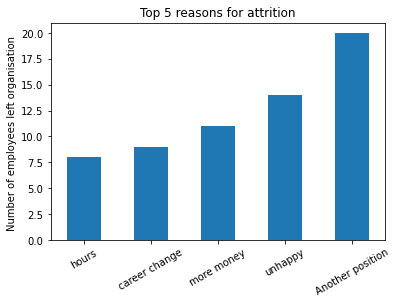

In [10]:
#4. What are the Top 5 reasons for Attrition

df1=df
delete_row = df1[df1["TermReason"]=="N/A-StillEmployed"].index
df1 = df1.drop(delete_row)

#Top 5 reasons for leaving the organisation

plot1=df1["TermReason"]
plot1=df1["TermReason"].value_counts()
plot1=plot1.sort_values()[-5:].plot(kind='bar')
plt.title("Top 5 reasons for attrition")
plt.xticks(rotation=30)
plt.ylabel("Number of employees left organisation ")

#Insight: Getting another postion is the most common reason for attrition and hours of working being the least common.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

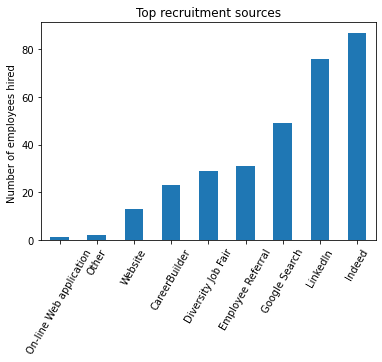

In [13]:
#5. Show Top recruitment sources in bar graph

plot1=df['RecruitmentSource']
plot1=df["RecruitmentSource"].value_counts()
plot1=plot1.sort_values().plot(kind='bar')
plt.title("Top recruitment sources")
plt.ylabel("Number of employees hired ")
plt.xticks(rotation=60)

# Indeed, LinkedIn and Google Search among top recruitment portals

In [14]:
#6. Out of males and females who draws higher average salary?

print (df.groupby('Sex').Salary.mean())

# From output we can clearly see that on ana average male employees draw higher salaries than their female counterparts 
# but the difference is not that subtantial hence we cannot say if the company is biased towards a specific gender

Sex
F     67786.727273
M     70629.400000
Name: Salary, dtype: float64


In [15]:
#7. List all employees with their last name who took more than 2 weeks leave of absence

df_new = df[df["Absences"] > 14 ]
print(df_new["Employee_Name"].str.split(",").str.get(0))


1      Ait Sidi
3        Alagbe
5      Anderson
6      Andreola
7        Athwal
         ...   
290        Vega
293        Volk
298        Wang
303    Williams
308      Zamora
Name: Employee_Name, Length: 96, dtype: object


In [16]:
#8. Average salary for all positions in the organisation

print (df.groupby('Position').Salary.mean())


Position
Accountant I                     63507.666667
Administrative Assistant         52280.000000
Area Sales Manager               64932.555556
BI Developer                     95465.000000
BI Director                     110929.000000
CIO                             220450.000000
Data Analyst                     89932.571429
Data Analyst                     88527.000000
Data Architect                  150290.000000
Database Administrator          108499.600000
Director of Operations          170500.000000
Director of Sales               180000.000000
Enterprise Architect            103613.000000
IT Director                     178000.000000
IT Manager - DB                 144959.500000
IT Manager - Infra              157000.000000
IT Manager - Support            138888.000000
IT Support                       63684.375000
Network Engineer                 61605.000000
President & CEO                 250000.000000
Principal Data Architect        120000.000000
Production Manager       

Text(0.5, 1.0, 'Pie Plot of different races')

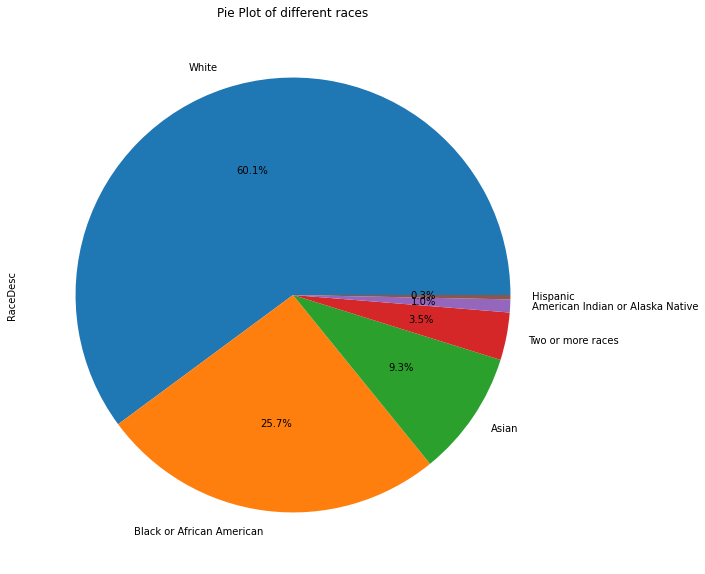

In [17]:
#9. Check whether this organisation is multicultural using a pie chart

plot1=df["RaceDesc"].value_counts()
plot1=plot1.plot(kind='pie', autopct='%1.1f%%',figsize=(10,10))
plt.title("Pie Plot of different races")

# Insight : From the below chart, the organisation seem to be biased towards White population who have 60% share. 
# The next two races are Asians and African Americans consituting ~ 36% share.
# Other races constiture very less percentage < 5%
# Hence this organisation seems biased and is not a good example of a multicultural environment. 

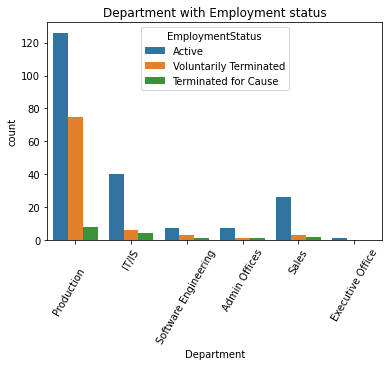

In [18]:
# 10. Find out ratio of employees in each department 

sns.countplot(x="Department", hue="EmploymentStatus", data=df)
plt.title("Department with Employment status",fontsize=12)
plt.xticks(rotation=60)
plt.show()

# As per the below plot maximum active employees are in Production department and least in Executive Office

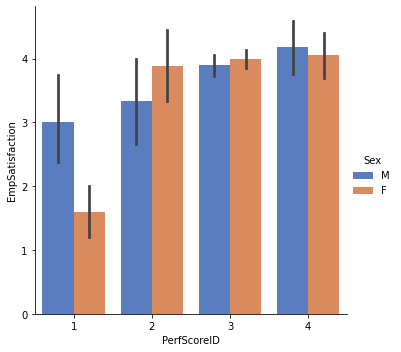

In [20]:
# 11. How both the genders fare in employee satisfaction and performance score

g = sns.catplot("PerfScoreID","EmpSatisfaction","Sex", data=df, kind="bar", palette="muted", legend=True)
plt.show()


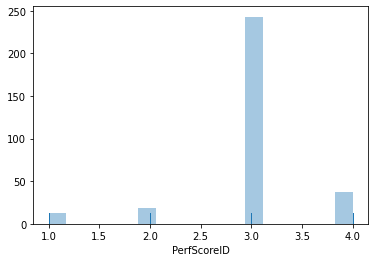

In [21]:
# 12. How is the overall performance of employees?

sns.distplot(df.PerfScoreID, kde=False, rug = True)

# Insight: Majority of the employees have more than average performance

In [22]:
# 13. How many employees in each department and their count as per citizenship

print(df['CitizenDesc'].value_counts(),"\n")
print("\n",df.groupby('Department')['DeptID'].count())

US Citizen             295
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64 


 Department
Admin Offices             9
Executive Office          1
IT/IS                    50
Production              209
Sales                    31
Software Engineering     11
Name: DeptID, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DF028DEF10>],
      dtype=object)

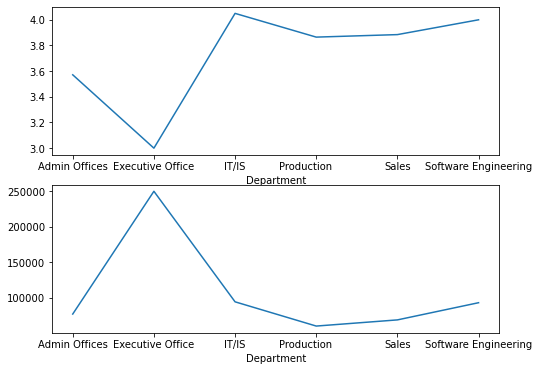

In [23]:
# 14. Check if low salaries is the reason for dissatisfaction.. meaning does high salary imply higher employee satisfaction 
# and vice-versa..

fig, (ax1, ax2) = plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(8)
df[df['EmploymentStatus']=='Active'].groupby('Department')['EmpSatisfaction'].mean().plot(kind='line', ax=ax1, subplots=True)
df[df['EmploymentStatus']=='Active'].groupby('Department')['Salary'].mean().plot(kind='line', ax=ax2, subplots=True)

# Insight: From the below plot we can see that Executive Office department draws highest average salaries still they have 
# lowest satisfaction. On the contrary all other departments have lower salaries but higher satisfaction hence they are
# not related and there may be other underlying factors causing this dissatisfaction.

In [24]:
# 15. How many males Vs females hired every year

# As the Year information is not readily available creating a new column to derive Year from date of hiring
df.DateofHire = pd.to_datetime(df.DateofHire)
df=df.assign(YearOfHire = df['DateofHire'].dt.year)

hire = pd.crosstab(df['YearOfHire'],df['Sex'])
print(hire)

# Insight : From the output clearly hiring was at its peak from 2011-2015. It has drastically low before and beyond that range.


Sex          F  M 
YearOfHire        
2006         0   1
2007         0   2
2008         3   0
2009         5   2
2010         5   4
2011        52  31
2012        23  22
2013        27  17
2014        31  29
2015        21  15
2016         8   6
2017         1   5
2018         0   1


### Summary of my investigation after analysing and visualising the HR dataset:

Link to the data set: https://www.kaggle.com/rhuebner/human-resources-data-set

Limitations of Dataset:

   - Missing information like ManagerID - This was replaced by '0' 
   - Different formats of DOB column - This was synced
   - Cells where year in DOB was mentioned in yy format and yy <= 69 it was read as 2069 instead of 1969. 
      Due to this issue we had to introduce a method to fix this date issue  
   - Need to check for duplicates
   
Based on the analysis of data here are my observations:
 
- Getting "another position" is the most common reason for attrition whereas "hours" of working being least common.

- Indeed, LinkedIn, Google Search being Top recruitment agencies used.

- From the pie chart, its clear that the organisation is biased towards Whites who own almost 60% share. 
  The next two races being Asians and African Americans constituting ~ 36%.Other races constitute very less percentage < 5%. 
  Hence, this organisation seems biased and is not a good example of a multicultural mindset. 
   
- High salaries do not guarantee job satisfaction. We saw highest salary takers showed highest dissatisfaction as well and       vice-versa.

- Hiring was at its peak from 2011-15. It was drastically low before & beyond that period.
  This implies that company was getting more projects/funding during 2011-15 hence its hiring capabilities improved.
      
- Each year more women are hired than men, although men have sligtly higher average salary than women.
  Therefore we can safely conclude that they are not gender-biased.

Likewise there can be many insights that can be derived by exploring and visualising a dataset.
I have only listed a few as part of this exercise.